In [34]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy



,TIME,CH1,CH1 Peak Detect,CH2,CH2 Peak Detect
0,-5.000000,0.432,0.424,-0.016,-3.200000e-02
1,-4.999992,0.432,0.440,-0.008,-1.788140e-10
2,-4.999984,0.432,0.424,-0.008,-3.200000e-02
3,-4.999976,0.432,0.440,-0.008,-1.788140e-10
4,-4.999968,0.432,0.424,-0.016,-3.200000e-02
...,...,...,...,...,...
1249995,4.999960,0.024,0.024,0.048,4.800000e-02
1249996,4.999968,0.024,0.008,0.032,1.600000e-02
1249997,4.999976,0.016,0.024,0.040,5.600000e-02
1249998,4.999984,0.024,0.008,0.040,1.600000e-02


Please note that all of the DataFrames are just named df as it is easier to manipulate the code.
It is recommended to calculate the desired result in the block of code where it is.

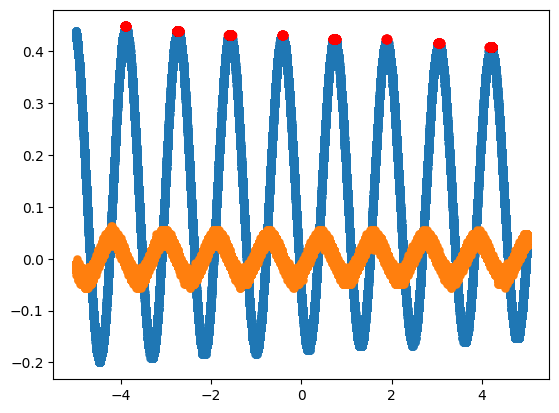

In [67]:
df=pd.read_csv("T0000.CSV", header=14)
plt.scatter(df["TIME"], df["CH1"], linewidth=0.1)
plt.scatter(df["TIME"], df["CH2"], linewidth=0.1)
peaks=scipy.signal.find_peaks(df["CH1"], prominence=0.1)
plt.scatter(df["TIME"][peaks[0]], df["CH1"][peaks[0]], color="red")
plt.show()

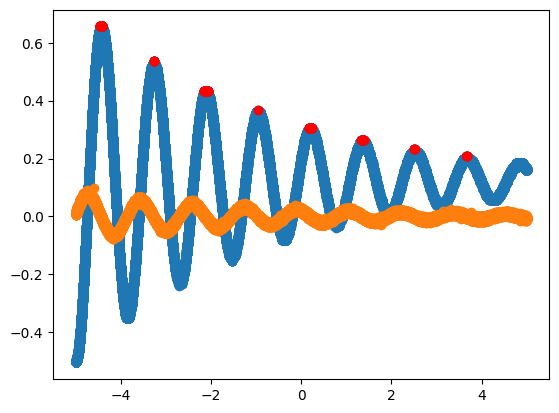

In [68]:
df=pd.read_csv("T0001.CSV", header=14)
plt.scatter(df["TIME"], df["CH1"])
plt.scatter(df["TIME"], df["CH2"])
peaks=scipy.signal.find_peaks(df["CH1"], prominence=0.1)
plt.scatter(df["TIME"][peaks[0]], df["CH1"][peaks[0]], color="red")
plt.show()

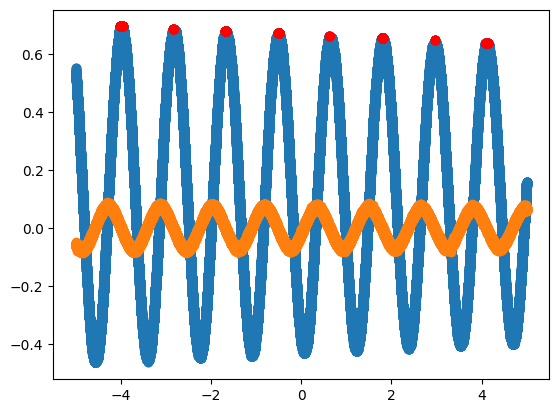

[ 12330  12346  12356  12368  12398  12421  12458  12469  12478  12480
  12485  12495  12501  12518  12568  12575  12590  12616  12682  12718
  12743  12747  12758  12786  12798  12806  12815  12818  12833  12851
  12863  12865  12871  12878  12884  12888  12892  12894  12899  12909
  12914  12927  12929  12939  12958  12970  12972  12977  12994  12997
  27002  27006  27054  27062  27069  27109  27115  27127  41441  41448
  41465  41468  41485  41490  41498  41500  41511  41513  41516  41521
  41524  41528  41533  41537  41541  41543  41546  41548  41550  41556
  41561  41566  41570  41572  41579  41584  41587  41590  41596  41600
  41604  41606  41610  41612  41614  41618  41622  41629  41635  41644
  41650  41654  41658  41664  41671  41677  41681  41689  41693  41695
  41705  41708  41713  41720  41725  41732  41738  41760  41764  41772
  56052  56090  56100  56117  56127  56133  56137  56139  56142  56148
  56152  56156  56161  56164  56167  56172  56174  56176  56179  56183
  5618

In [70]:
df=pd.read_csv("T0002.CSV", header=14)
df
plt.scatter(df["TIME"], df["CH1"])
plt.scatter(df["TIME"], df["CH2"])
peaks=scipy.signal.find_peaks(df["CH1"], prominence=0.1)
plt.scatter(df["TIME"][peaks[0]], df["CH1"][peaks[0]], color="red")
plt.show()
print(peaks[0])